# Домашна задача 5
## Виртуелни општества 2018/2019
### Андреј Јанчевски - 151003

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas
import networkx as nx
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder, AverageEmbedder, WeightedL1Embedder, WeightedL2Embedder
import random

C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Тестирање на Node2Vec

In [2]:
ak_graph = nx.read_gml("using_networkx/anna.gml")
num_nodes = ak_graph.number_of_nodes()
num_edges = ak_graph.number_of_edges()
num_nodes, num_edges

(138, 493)

In [3]:
node_label_mapping = dict([(node, ak_graph.nodes[node]["desc"].split(", ")[0])
                           for node in list(ak_graph.nodes)])
ak_graph = nx.relabel_nodes(ak_graph, node_label_mapping)

In [4]:
node2vec = Node2Vec(
    ak_graph, dimensions=500, walk_length=50, num_walks=100, workers=6)

Computing transition probabilities: 100%|██████████| 138/138 [00:00<00:00, 2121.68it/s]


In [5]:
num_features = 100  # Word vector dimensionality
min_word_count = 1  # Minimum word count
num_workers = 6  # Number of threads to run in parallel
context = 5  # Context window size
downsampling = 1e-3  # Downsample setting for frequent words
model = node2vec.fit(
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context,
    sample=downsampling)

In [6]:
model.wv.most_similar('Anna Arkadyevna Karenina')

C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Mihail', 0.655712902545929),
 ('Prince Kaluzhsky', 0.5401651263237),
 ('Fyodor 1', 0.5294583439826965),
 ('Mariette', 0.527280330657959),
 ('Stremov', 0.5194687843322754),
 ('Liza Merkalova', 0.5111852288246155),
 ('Sappho Shtolz', 0.5064618587493896),
 ('Princess Betsy Tverskaya', 0.49195951223373413),
 ('Vassily Lukitch Sitnikov', 0.4779939651489258),
 ('Vaska', 0.4763685166835785)]

In [7]:
model.wv.save_word2vec_format("anna.embeddings")
model.save("anna.model")

In [8]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
edges_embs[('Anna Arkadyevna Karenina', 'Alexey Alexandrovitch Karenin')]

array([ 9.86871481e-01,  7.69598126e-01, -3.16667855e-02, -1.03398526e+00,
        5.26066363e-01, -5.30214429e-01,  5.06656468e-02, -2.57813722e-01,
        4.47762311e-01, -4.45512198e-02,  2.54645467e-01,  9.25373018e-01,
       -4.25916135e-01,  5.52778207e-02,  5.76400049e-02, -2.13810340e-01,
        1.57655496e-03, -1.67271033e-01, -2.88049370e-01, -6.53878927e-01,
       -2.19521195e-01,  3.32469404e-01,  5.57885244e-02, -2.00023115e-01,
        8.89113188e-01, -1.11784029e+00, -7.41280168e-02,  1.75628471e+00,
       -7.70794868e-01, -1.59661502e-01, -3.06230248e-03,  1.29413560e-01,
        2.51344740e-01,  4.62675422e-01, -2.65398294e-01,  1.80619776e-01,
        1.92264795e+00,  1.85937434e-01,  2.81748009e+00, -2.48713076e-01,
        3.13130349e-01,  7.01719448e-02,  7.65838742e-01,  3.28808337e-01,
       -1.54558077e-01, -1.78425640e-01,  8.50272700e-02,  1.41882944e+00,
       -5.88552356e-02,  6.16553389e-02,  1.92421627e+00,  5.02041996e-01,
        2.72957701e-03, -

In [9]:
edges_kv = edges_embs.as_keyed_vectors()
edges_kv.most_similar(
    str(('Alexey Alexandrovitch Karenin', 'Anna Arkadyevna Karenina')))

Generating edge features: 100%|██████████| 9591/9591.0 [00:00<00:00, 208642.73it/s]


[("('Anna Arkadyevna Karenina', 'Marya Efimovna')", 0.7553941607475281),
 ("('Anna Arkadyevna Karenina', 'Kapitonitch')", 0.6882206201553345),
 ("('Alexey Alexandrovitch Karenin', 'Mihail Vassilievitch Sludin')",
  0.6651780605316162),
 ("('Anna Arkadyevna Karenina', 'Vassily Lukitch Sitnikov')",
  0.6310938596725464),
 ("('Alexey Alexandrovitch Karenin', 'Vassily Lukitch Sitnikov')",
  0.6294063329696655),
 ("('Anna Arkadyevna Karenina', 'Korney')", 0.6188245415687561),
 ("('Alexey Alexandrovitch Karenin', 'Kapitonitch')", 0.5975158214569092),
 ("('Anna Arkadyevna Karenina', 'Nadinka')", 0.5927717685699463),
 ("('Alexey Alexandrovitch Karenin', 'Alexey Alexandrovitch Karenin')",
  0.5838126540184021),
 ("('Anna Arkadyevna Karenina', 'Miss Edwards')", 0.5800164341926575)]

In [10]:
edges_kv.save_word2vec_format("anna_edges.embeddings")

### Поделба на рабовите на множество за тренирање и тестирање

In [26]:
def split_edges_train_test(graph):
    edges = list(graph.edges)
    random.shuffle(edges)
    test_edges = []
    max_test_edges = int(0.3 * num_edges)
    train_edge_graph = graph.copy()
    max_iterations = max_test_edges * 10
    iteration = 0
    num_cc = len(list(nx.connected_components(graph)))
    # ako ne mozhe da se dodatat 30% od rabovite za testiranje bez da se podeli komponentata
    # prekini posle odreden broj obidi za da ne trae beskonechno
    while len(test_edges) < max_test_edges and iteration < max_iterations:
        train_edges = list(train_edge_graph.edges)
        edge_to_move = random.sample(train_edges, 1)[0]
        new_train_edge_graph = train_edge_graph.copy()
        new_train_edge_graph.remove_edge(edge_to_move[0], edge_to_move[1])
        cc = list(nx.connected_components(new_train_edge_graph))
        if len(cc) == num_cc:
            test_edges.append(edge_to_move)
            train_edge_graph = new_train_edge_graph.copy()
        iteration += 1
    train_edges = list(train_edge_graph.edges)
    # za nekoi grafovi ne mozhe da ne se podeli komponentata i gorniot metod nieden rab nema da go zeme za testiranje
    if len(test_edges) == 0:
        print("UNABLE TO SPLIT EDGES NORMALLY, SPLITTING BY RANDOM SAMPLING!")
        random.shuffle(train_edges)
        test_edges = train_edges[int(0.7 * num_edges):]
        train_edges = train_edges[:int(0.7 * num_edges)]
    return train_edges, test_edges

C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


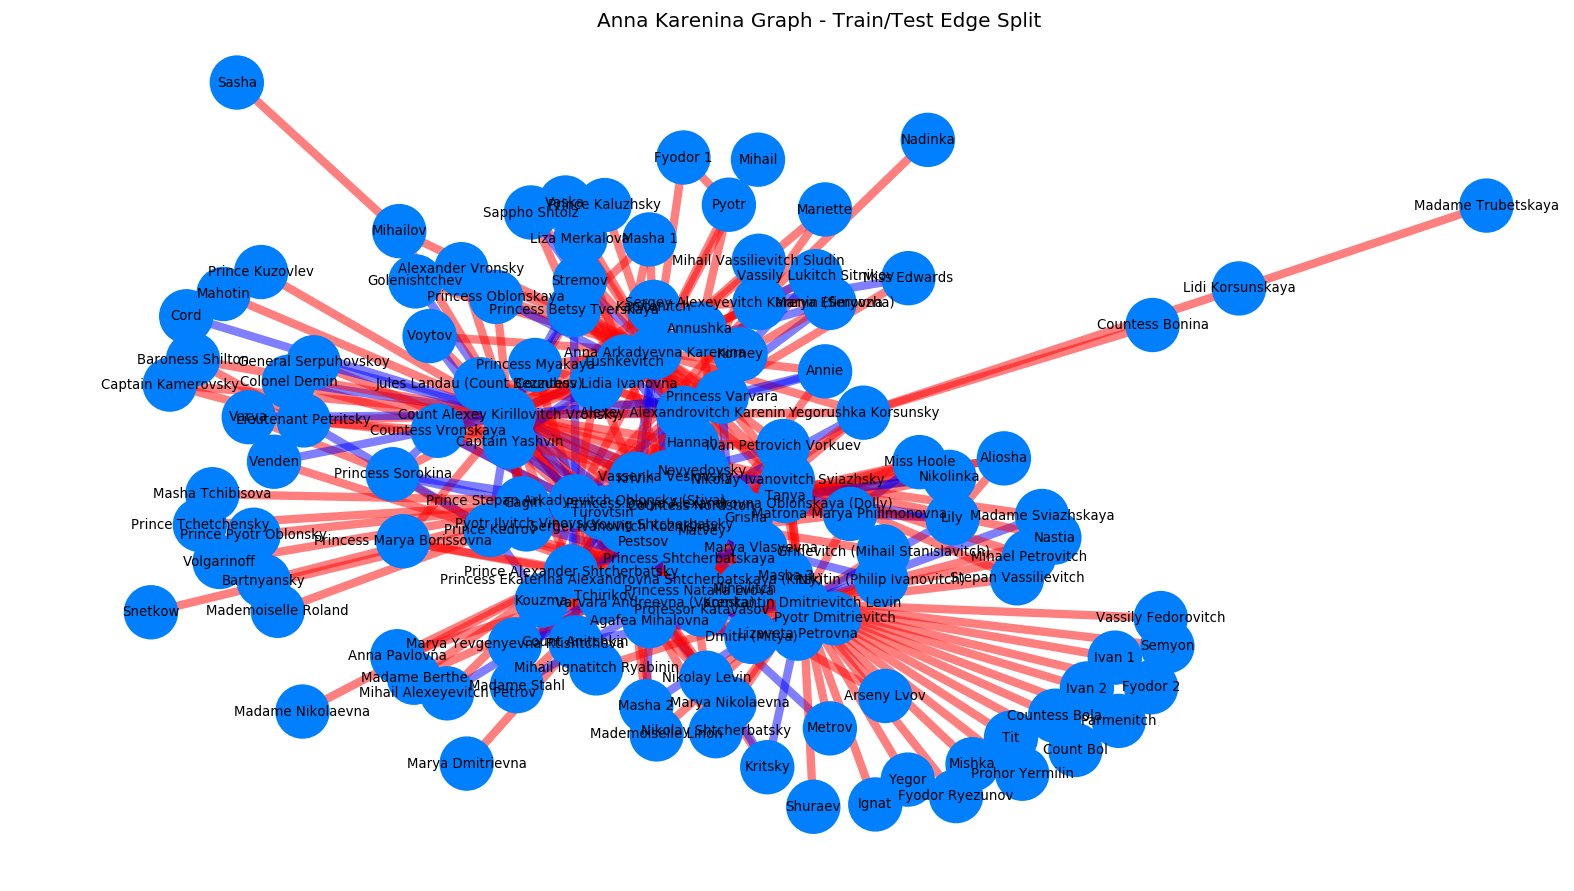

In [12]:
ak_train_edges, ak_test_edges = split_edges_train_test(ak_graph)
node_positions = nx.drawing.layout.spring_layout(
    ak_graph, seed=57, iterations=5000, k=10)
node_cmap = edge_cmap = plt.get_cmap("cool")
node_colors = [
    (0, 0.5, 1),
] * num_nodes
edge_colors = []
edge_colors = [
    "red" if edge in ak_train_edges else "blue"
    for edge in list(ak_graph.edges)
]
plt.figure(1, (16, 9), dpi=int(1920 / 16))
nx.draw_networkx_nodes(
    ak_graph,
    pos=node_positions,
    node_size=1000,
    node_color=node_colors,
    alpha=1)
nx.draw_networkx_labels(ak_graph, pos=node_positions, font_size=8)
nx.draw_networkx_edges(
    ak_graph, pos=node_positions, width=5, edge_color=edge_colors, alpha=0.5)
plt.title("Anna Karenina Graph - Train/Test Edge Split", fontsize=12)
plt.axis('off')
plt.show()

In [13]:
def get_node2vec_edge_features(graph):
    node2vec = Node2Vec(
        graph, dimensions=500, walk_length=50, num_walks=100, workers=6)
    model = node2vec.fit(
        workers=num_workers,
        size=num_features,
        min_count=min_word_count,
        window=context,
        sample=downsampling)
    edges_embs_average = AverageEmbedder(keyed_vectors=model.wv)
    edges_embs_hadamard = HadamardEmbedder(keyed_vectors=model.wv)
    edges_embs_l1 = WeightedL1Embedder(keyed_vectors=model.wv)
    edges_embs_l2 = WeightedL2Embedder(keyed_vectors=model.wv)
    features = np.zeros((nx.number_of_edges(graph), num_features * 4))
    for i, edge in enumerate(list(graph.edges)):
        features[i] = np.hstack(
            (edges_embs_average[edge], edges_embs_hadamard[edge],
             edges_embs_l1[edge], edges_embs_l2[edge]))
    return features

In [14]:
def get_link_prediction_dataset(graph):
    train_edges, test_edges = split_edges_train_test(graph)

    train_edge_graph = nx.Graph()
    train_edge_graph.add_edges_from(train_edges)

    test_edge_graph = nx.Graph()
    test_edge_graph.add_edges_from(test_edges)

    train_non_edges = list(nx.non_edges(train_edge_graph))
    if len(train_non_edges) > len(train_edges):
        train_non_edges = random.sample(train_non_edges, len(train_edges))

    test_non_edges = list(nx.non_edges(test_edge_graph))
    if len(test_non_edges) > len(test_edges):
        test_non_edges = random.sample(test_non_edges, len(test_edges))

    train_non_edge_graph = nx.Graph()
    train_non_edge_graph.add_edges_from(train_non_edges)

    test_non_edge_graph = nx.Graph()
    test_non_edge_graph.add_edges_from(test_non_edges)

    train_pos_features = get_node2vec_edge_features(train_edge_graph)
    train_labels = [
        1,
    ] * train_pos_features.shape[0]
    train_neg_features = get_node2vec_edge_features(train_non_edge_graph)
    train_labels.extend([
        0,
    ] * train_neg_features.shape[0])
    train_set = np.vstack((train_pos_features, train_neg_features))

    test_pos_features = get_node2vec_edge_features(test_edge_graph)
    test_labels = [
        1,
    ] * test_pos_features.shape[0]
    test_neg_features = get_node2vec_edge_features(test_non_edge_graph)
    test_labels.extend([
        0,
    ] * test_neg_features.shape[0])
    test_set = np.vstack((test_pos_features, test_neg_features))

    return train_set, train_labels, test_set, test_labels

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
naive_bayes = GaussianNB()
knn = KNeighborsClassifier(
    n_neighbors=20,
    weights="distance",
    algorithm="auto",
    metric="cosine",
    n_jobs=-1)
svm = SVC(
    C=1e8,
    kernel='rbf',
    gamma="scale",
    decision_function_shape="ovr",
    class_weight="balanced",
    probability=True)
logistic_regression = LogisticRegression(
    C=1e8,
    solver='newton-cg',
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1)
random_forest = RandomForestClassifier(
    n_estimators=1000,
    criterion="entropy",
    min_samples_leaf=5,
    class_weight="balanced",
    n_jobs=-1)
neural_network = MLPClassifier(
    hidden_layer_sizes=(200, 100),
    activation="tanh",
    solver="adam",
    learning_rate="adaptive",
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score


def train_and_score_classifiers(dataset_tuple):
    train_set, train_labels, test_set, test_labels = dataset_tuple

    scores = {}

    naive_bayes.fit(train_set, train_labels)
    predicted_labels = naive_bayes.predict(test_set)
    scores[naive_bayes] = f1_score(test_labels, predicted_labels)
    print("Naive Bayes done")

    knn.fit(train_set, train_labels)
    predicted_labels = knn.predict(test_set)
    scores[knn] = f1_score(test_labels, predicted_labels)
    print("KNN done")

    logistic_regression.fit(train_set, train_labels)
    predicted_labels = logistic_regression.predict(test_set)
    scores[logistic_regression] = f1_score(test_labels, predicted_labels)
    print("Logistic Regression done")

    svm.fit(train_set, train_labels)
    predicted_labels = svm.predict(test_set)
    scores[svm] = f1_score(test_labels, predicted_labels)
    print("SVM done")

    neural_network.fit(train_set, train_labels)
    predicted_labels = neural_network.predict(test_set)
    scores[neural_network] = f1_score(test_labels, predicted_labels)
    print("Neural Network done")

    random_forest.fit(train_set, train_labels)
    predicted_labels = random_forest.predict(test_set)
    scores[random_forest] = f1_score(test_labels, predicted_labels)
    print("Random Forest done")

    print(scores.values())

    best_model = max(scores.items(), key=lambda x: x[1])
    best_model = best_model[0]
    return best_model

### Link prediction кај Ана Каренина графот

In [42]:
ak_graph = nx.read_gml("using_networkx/anna.gml")
num_nodes = ak_graph.number_of_nodes()
num_edges = ak_graph.number_of_edges()
num_nodes, num_edges

(138, 493)

In [46]:
dataset_tuple = get_link_prediction_dataset(ak_graph)
train_set, train_labels, test_set, test_labels = dataset_tuple

Computing transition probabilities: 100%|██████████| 86/86 [00:00<00:00, 14328.11it/s]


In [47]:
best_model = train_and_score_classifiers(dataset_tuple)
best_model

Naive Bayes done
KNN done
Logistic Regression done
SVM done
Neural Network done
Random Forest done
dict_values([0.7591623036649214, 0.7632311977715879, 0.7357512953367875, 0.6681818181818182, 0.7728613569321534, 0.835820895522388])


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

Accuracy: 0.8061224489795918
ROC AUC score: 0.930723309732056
Confusion Matrix: 
[[ 98  49]
 [  8 139]]


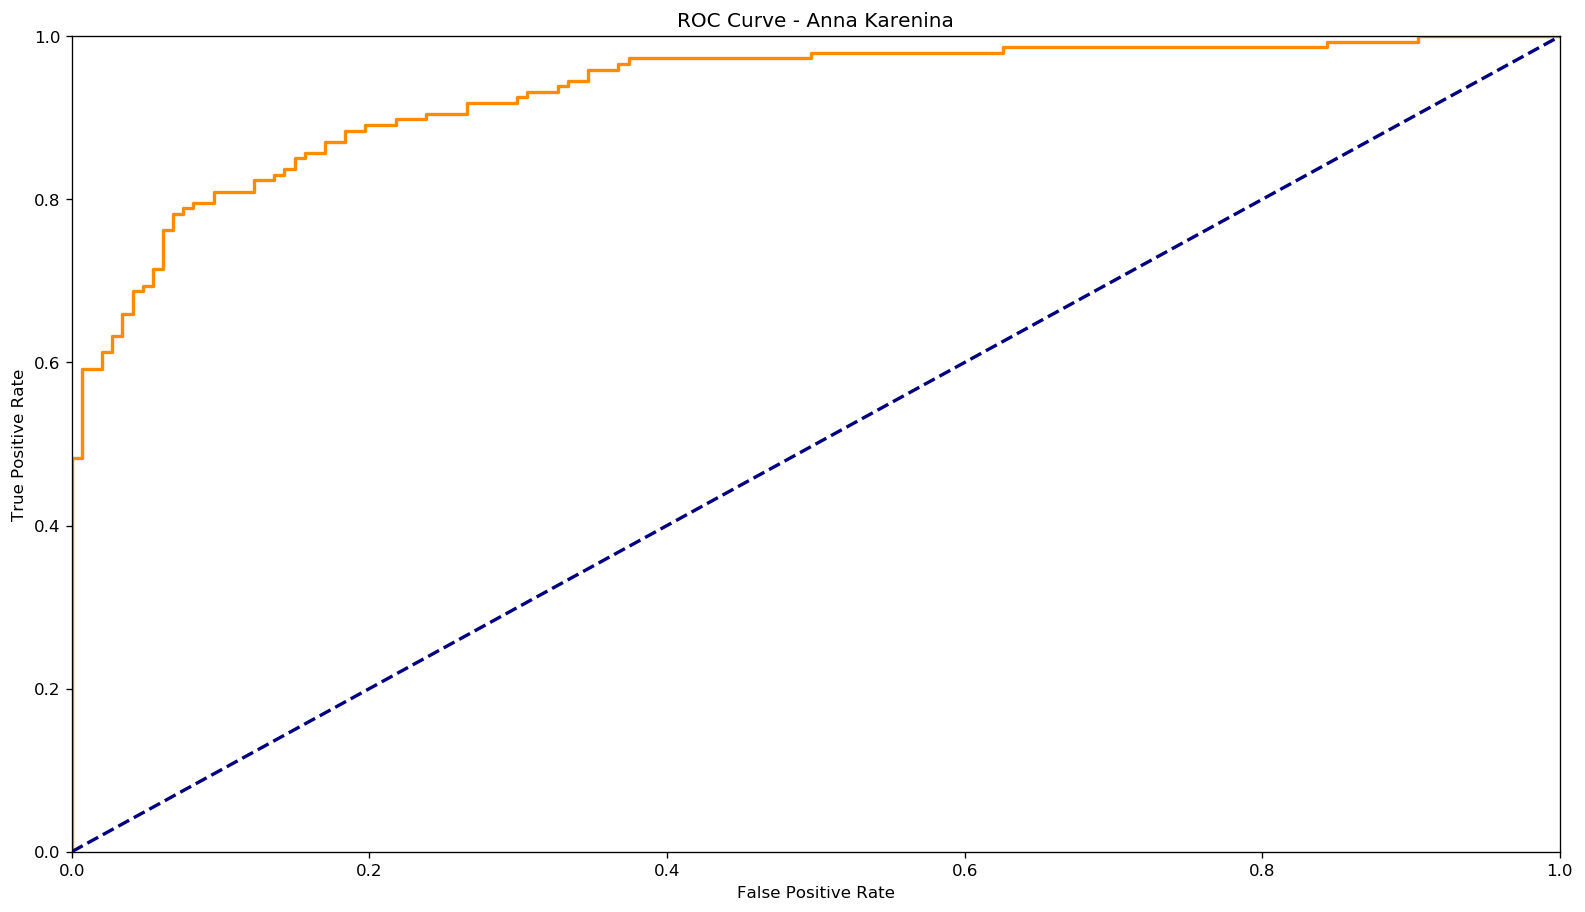

In [48]:
best_model.fit(train_set, train_labels)
predicted_labels = best_model.predict(test_set)
predicted_probs = best_model.predict_proba(test_set)
accuracy = accuracy_score(test_labels, predicted_labels)
roc_score = roc_auc_score(test_labels, predicted_probs[:, 1])
print('Accuracy: ' + str(accuracy))
print('ROC AUC score: ' + str(roc_score))
print('Confusion Matrix: \n' +
      str(confusion_matrix(test_labels, predicted_labels)))
fpr, tpr, _ = roc_curve(test_labels, predicted_probs[:, 1], pos_label=1)
plt.figure(figsize=(16, 9), dpi=1920 / 16)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Anna Karenina')
plt.show()

### Link prediction кај Florentine Families графот

In [26]:
ff_graph = nx.florentine_families_graph()
num_nodes = ff_graph.number_of_nodes()
num_edges = ff_graph.number_of_edges()
num_nodes, num_edges

(15, 20)

In [33]:
dataset_tuple = get_link_prediction_dataset(ff_graph)
train_set, train_labels, test_set, test_labels = dataset_tuple

Computing transition probabilities: 100%|██████████| 8/8 [00:00<00:00, 8021.62it/s]


In [34]:
best_model = train_and_score_classifiers(dataset_tuple)
best_model

Naive Bayes done
KNN done
Logistic Regression done
SVM done
Neural Network done
Random Forest done
dict_values([0.625, 0.6666666666666666, 0.8, 0.7272727272727272, 0.5333333333333333, 0.7272727272727272])


LogisticRegression(C=100000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

Accuracy: 0.8333333333333334
ROC AUC score: 0.6666666666666666
Confusion Matrix: 
[[6 0]
 [2 4]]


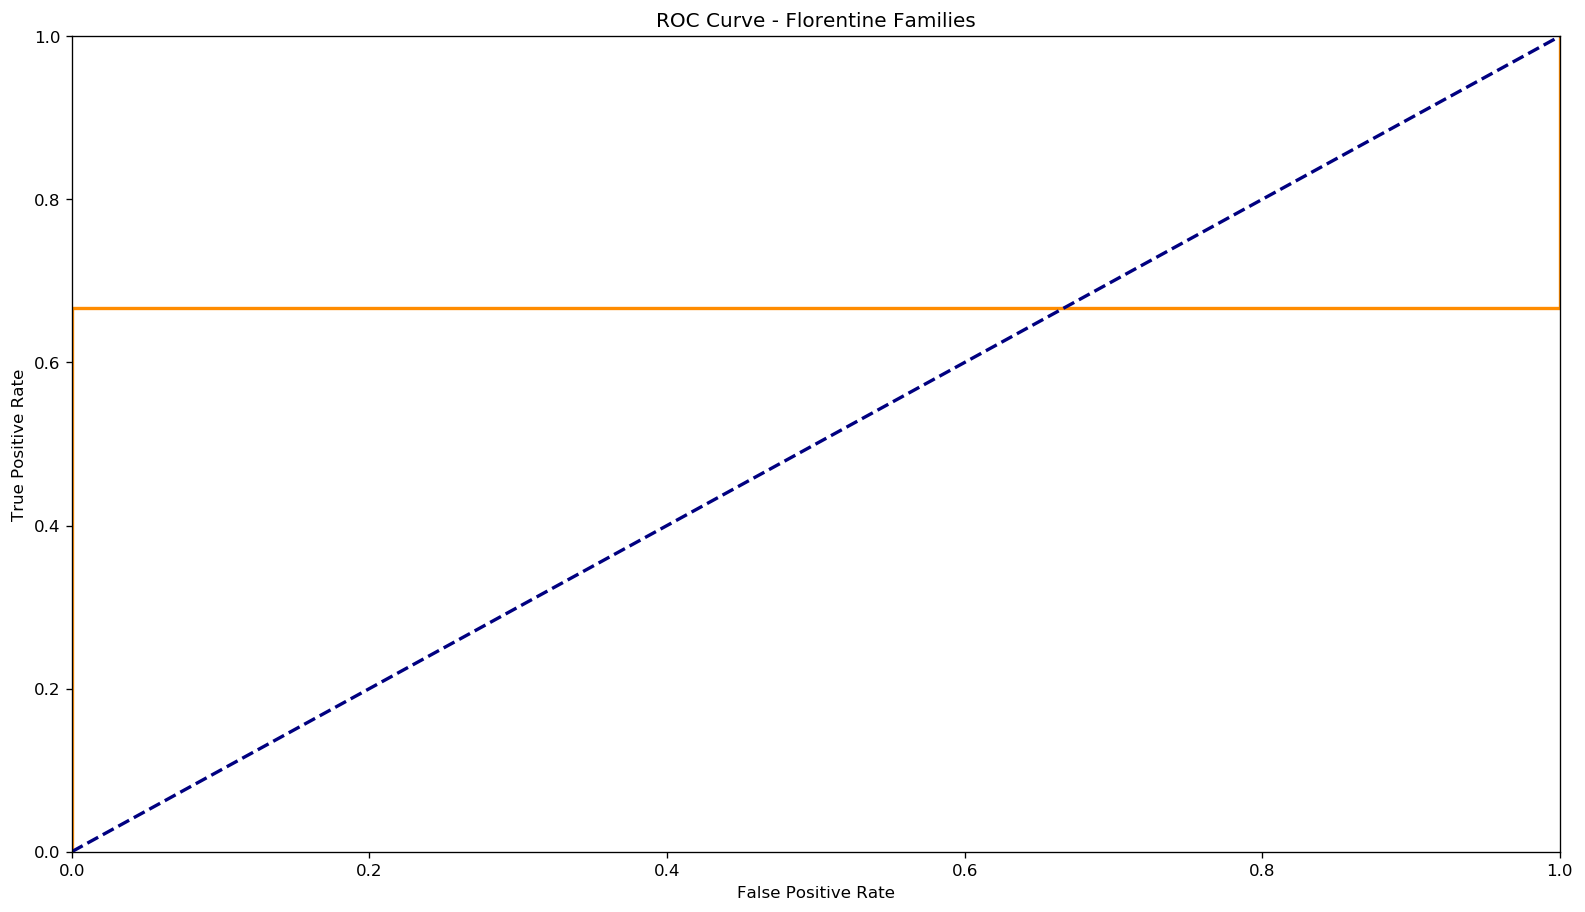

In [35]:
best_model.fit(train_set, train_labels)
predicted_labels = best_model.predict(test_set)
predicted_probs = best_model.predict_proba(test_set)
accuracy = accuracy_score(test_labels, predicted_labels)
roc_score = roc_auc_score(test_labels, predicted_probs[:, 1])
print('Accuracy: ' + str(accuracy))
print('ROC AUC score: ' + str(roc_score))
print('Confusion Matrix: \n' +
      str(confusion_matrix(test_labels, predicted_labels)))
fpr, tpr, _ = roc_curve(test_labels, predicted_probs[:, 1], pos_label=1)
plt.figure(figsize=(16, 9), dpi=1920 / 16)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Florentine Families')
plt.show()

### Link prediction кај Karate Club графот

In [35]:
kc_graph = nx.karate_club_graph()
num_nodes = kc_graph.number_of_nodes()
num_edges = kc_graph.number_of_edges()
num_nodes, num_edges

(34, 78)

In [39]:
node_label_mapping = dict([(node, str(node)) for node in list(kc_graph.nodes)])
kc_graph = nx.relabel_nodes(kc_graph, node_label_mapping)
dataset_tuple = get_link_prediction_dataset(kc_graph)
train_set, train_labels, test_set, test_labels = dataset_tuple

Computing transition probabilities: 100%|██████████| 22/22 [00:00<00:00, 22006.84it/s]


In [40]:
best_model = train_and_score_classifiers(dataset_tuple)
best_model

Naive Bayes done
KNN done
Logistic Regression done
SVM done
Neural Network done
Random Forest done
dict_values([0.5454545454545454, 0.7719298245614036, 0.721311475409836, 0.71875, 0.7586206896551724, 0.5333333333333332])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
           weights='distance')

Accuracy: 0.717391304347826
ROC AUC score: 0.7769376181474481
Confusion Matrix: 
[[11 12]
 [ 1 22]]


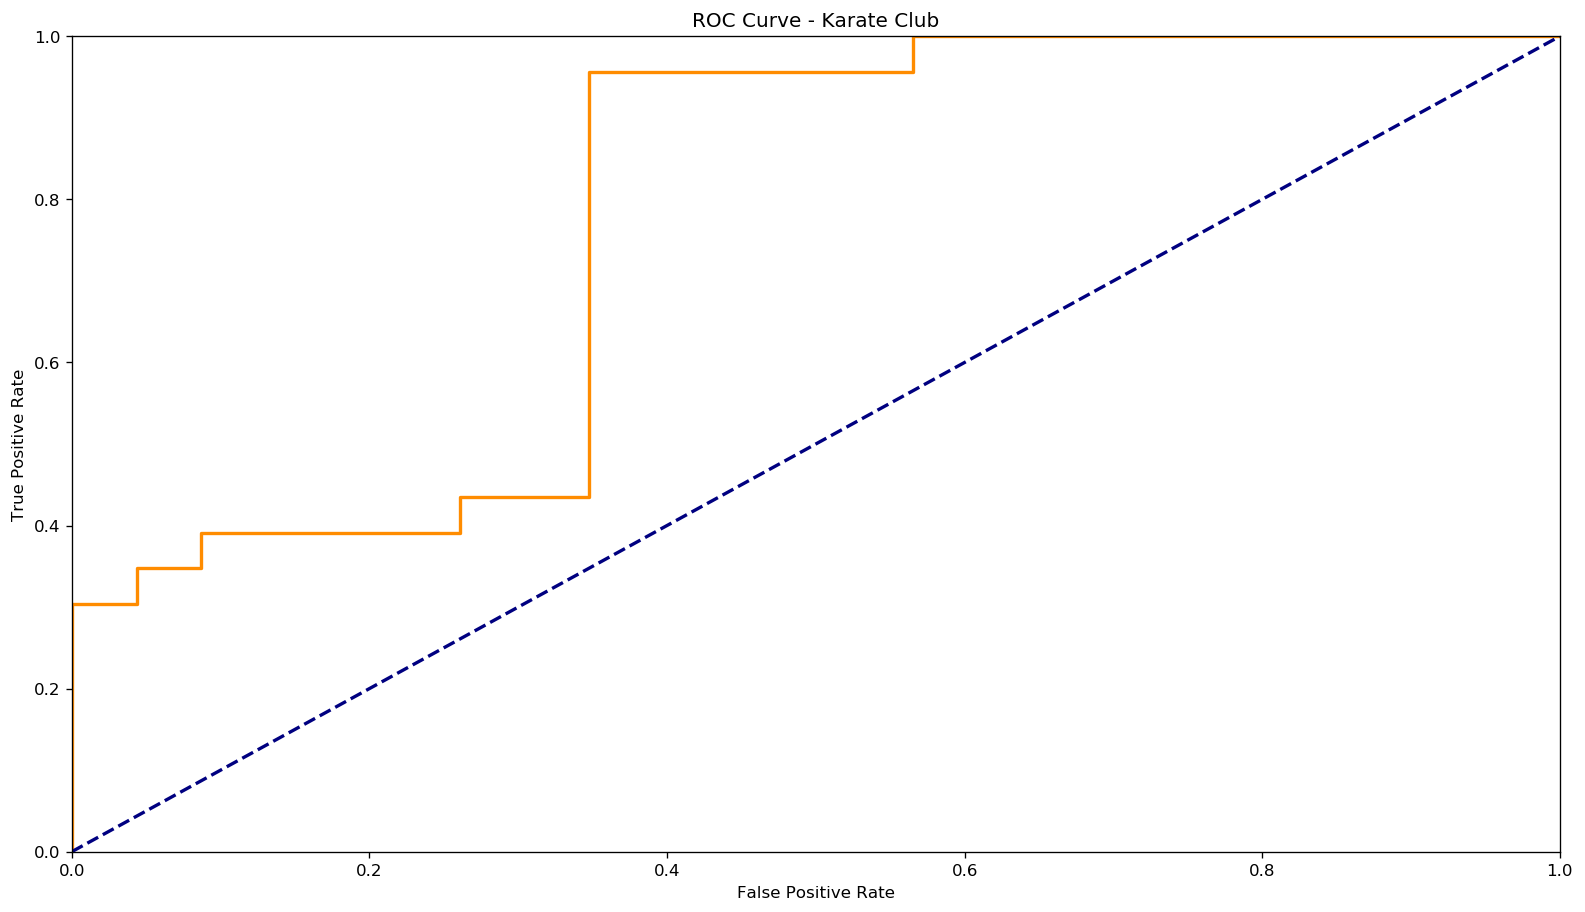

In [41]:
best_model.fit(train_set, train_labels)
predicted_labels = best_model.predict(test_set)
predicted_probs = best_model.predict_proba(test_set)
accuracy = accuracy_score(test_labels, predicted_labels)
roc_score = roc_auc_score(test_labels, predicted_probs[:, 1])
print('Accuracy: ' + str(accuracy))
print('ROC AUC score: ' + str(roc_score))
print('Confusion Matrix: \n' +
      str(confusion_matrix(test_labels, predicted_labels)))
fpr, tpr, _ = roc_curve(test_labels, predicted_probs[:, 1], pos_label=1)
plt.figure(figsize=(16, 9), dpi=1920 / 16)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Karate Club')
plt.show()

### Link prediction кај FIFA графовите

In [17]:
fifa2006 = pandas.read_csv(
    "./FIFA CSV/2006_FIFA_1M.csv", encoding="utf-8", index_col=0)
nrows2006, ncols2006 = fifa2006.shape
fifa2015 = pandas.read_csv(
    "./FIFA CSV/2015_FIFA_1M.csv", encoding="utf-8", index_col=0)
nrows2015, ncols2015 = fifa2015.shape

In [18]:
people2006 = fifa2006.columns
fifa2006_graph = nx.Graph()
edge_threshold = 0
for i in range(0, nrows2006):
    person = people2006[i]
    for j in range(i + 1, ncols2006):
        person2 = people2006[j]
        interactions = fifa2006[person][person2]
        if interactions > edge_threshold:
            fifa2006_graph.add_edge(person, person2)

for person in people2006:
    fifa2006_graph.add_node(person)

In [19]:
people2015 = fifa2015.columns
fifa2015_graph = nx.Graph()
edge_threshold = 0
for i in range(0, nrows2015):
    person = people2015[i]
    for j in range(i + 1, ncols2015):
        person2 = people2015[j]
        interactions = fifa2015[person][person2]
        if interactions > edge_threshold:
            fifa2015_graph.add_edge(person, person2)

for person in people2015:
    fifa2015_graph.add_node(person)

In [27]:
num_nodes = fifa2006_graph.number_of_nodes()
num_edges = fifa2006_graph.number_of_edges()
num_nodes, num_edges

(340, 3328)

In [28]:
dataset_tuple = get_link_prediction_dataset(fifa2006_graph)
train_set, train_labels, test_set, test_labels = dataset_tuple

Computing transition probabilities: 100%|██████████| 336/336 [00:00<00:00, 6108.18it/s]


In [29]:
best_model = train_and_score_classifiers(dataset_tuple)
best_model

Naive Bayes done
KNN done
Logistic Regression done
SVM done
Neural Network done
Random Forest done
dict_values([0.7585350713842335, 0.6649006622516556, 0.9179856115107914, 0.9516380655226209, 0.9103380695737384, 0.8120567375886524])


SVC(C=100000000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy: 0.9534068136272545
ROC AUC score: 0.9958725065361184
Confusion Matrix: 
[[988  10]
 [ 83 915]]


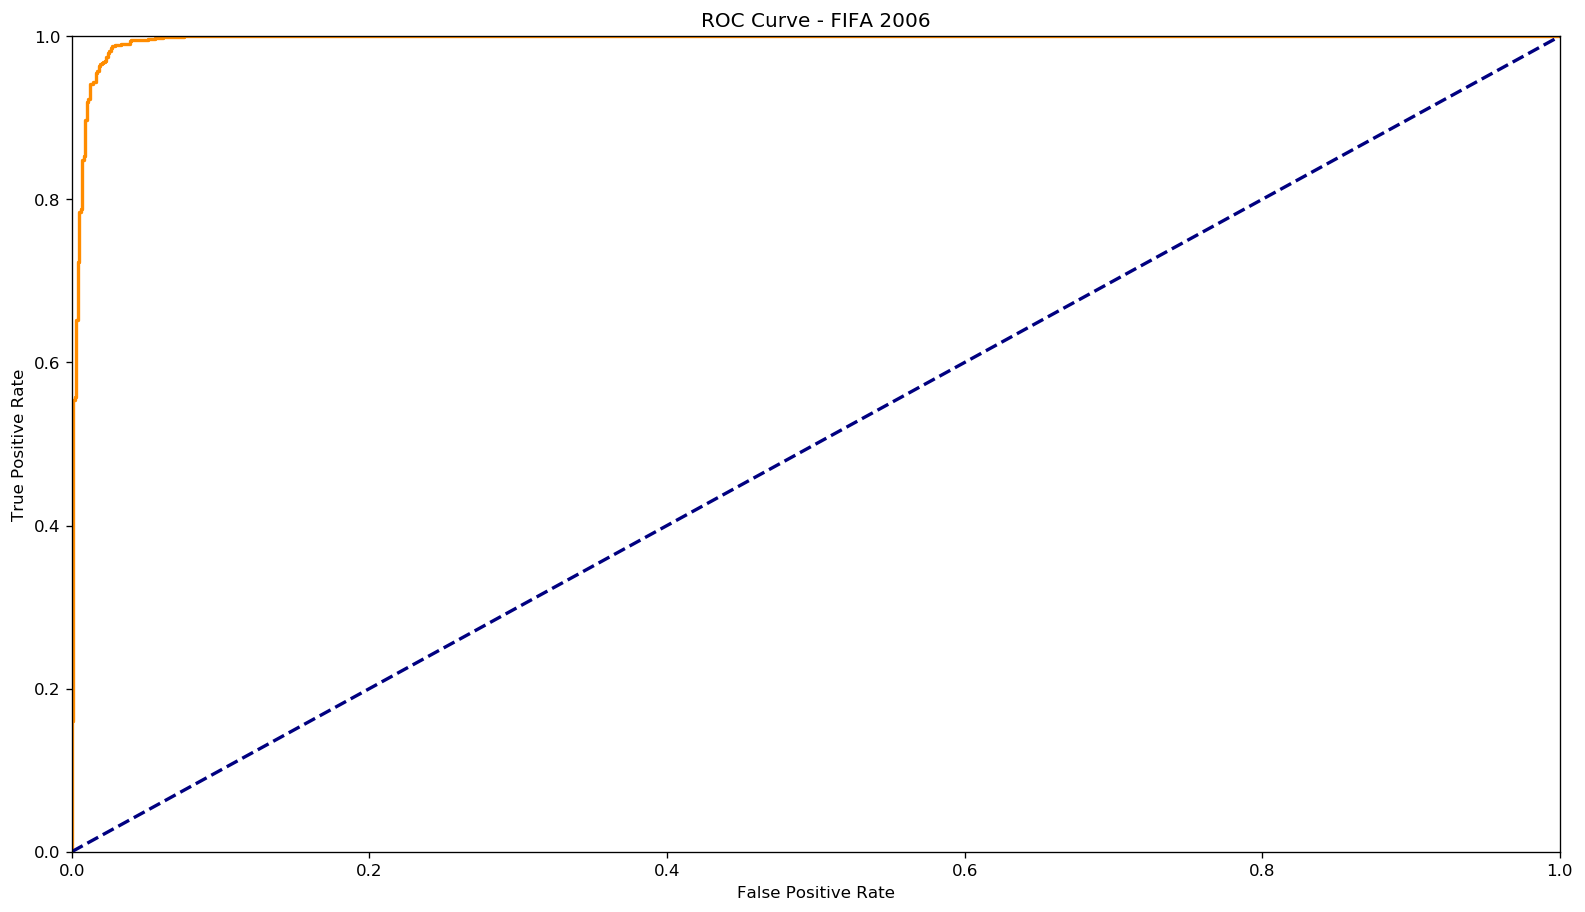

In [30]:
best_model.fit(train_set, train_labels)
predicted_labels = best_model.predict(test_set)
predicted_probs = best_model.predict_proba(test_set)
accuracy = accuracy_score(test_labels, predicted_labels)
roc_score = roc_auc_score(test_labels, predicted_probs[:, 1])
print('Accuracy: ' + str(accuracy))
print('ROC AUC score: ' + str(roc_score))
print('Confusion Matrix: \n' +
      str(confusion_matrix(test_labels, predicted_labels)))
fpr, tpr, _ = roc_curve(test_labels, predicted_probs[:, 1], pos_label=1)
plt.figure(figsize=(16, 9), dpi=1920 / 16)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - FIFA 2006')
plt.show()

In [31]:
num_nodes = fifa2015_graph.number_of_nodes()
num_edges = fifa2015_graph.number_of_edges()
num_nodes, num_edges

(450, 5022)

In [32]:
dataset_tuple = get_link_prediction_dataset(fifa2015_graph)
train_set, train_labels, test_set, test_labels = dataset_tuple

Computing transition probabilities: 100%|██████████| 447/447 [00:00<00:00, 5135.45it/s]


In [33]:
best_model = train_and_score_classifiers(dataset_tuple)
best_model

Naive Bayes done
KNN done
Logistic Regression done
SVM done
Neural Network done
Random Forest done
dict_values([0.7393483709273183, 0.5558194774346793, 0.9245344658608298, 0.9176470588235294, 0.9118147769833164, 0.805194805194805])


LogisticRegression(C=100000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

Accuracy: 0.9233067729083665
ROC AUC score: 0.9659899578313571
Confusion Matrix: 
[[1366  140]
 [  91 1415]]


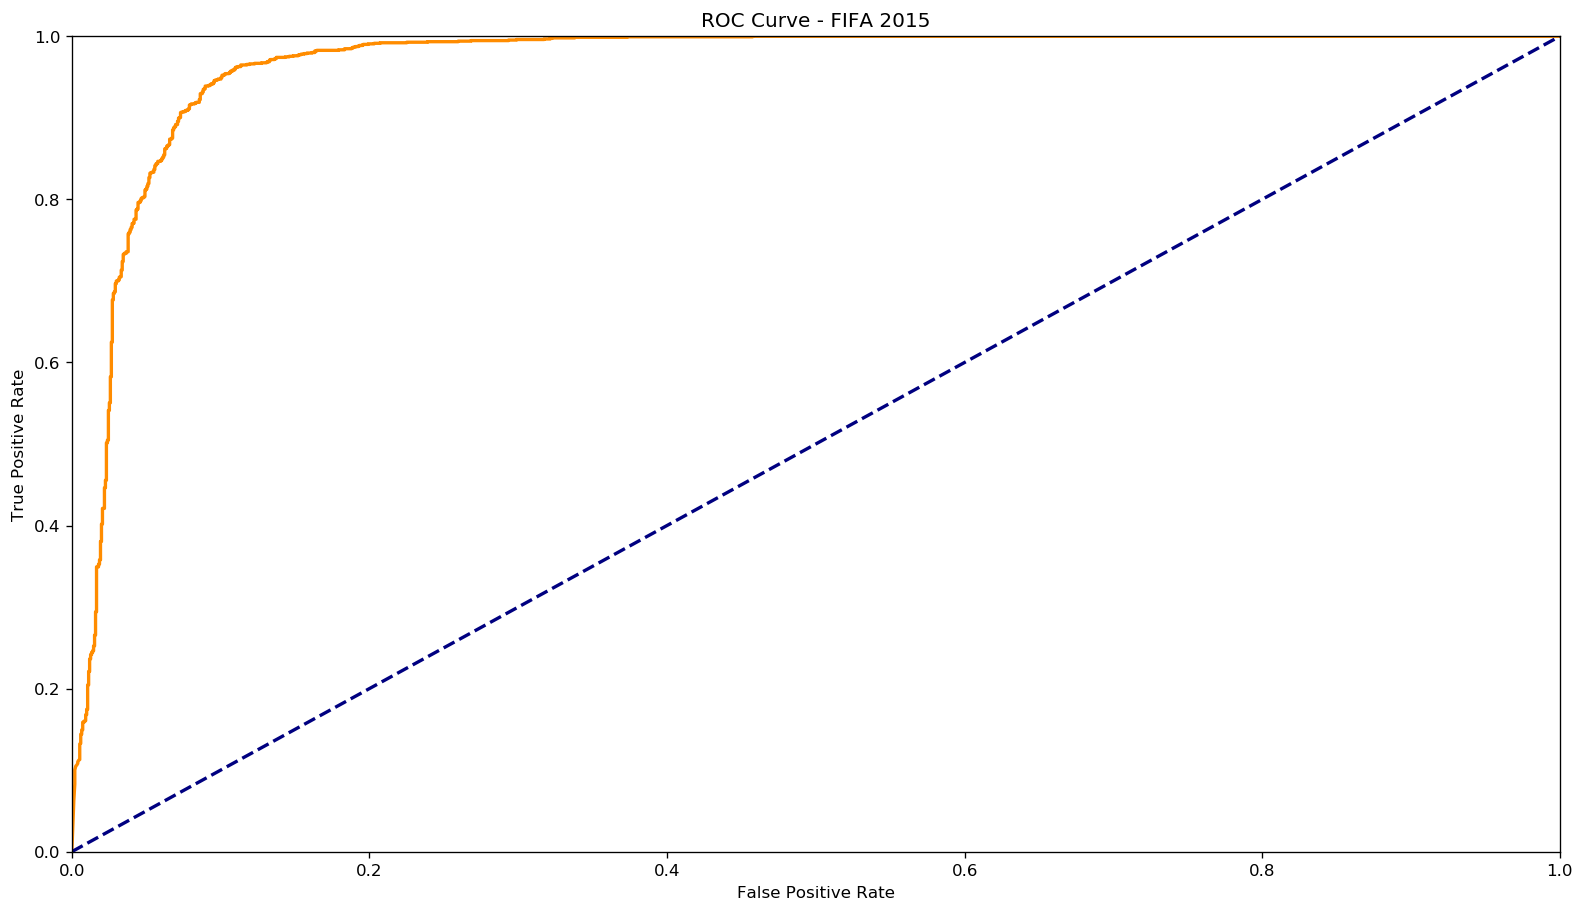

In [34]:
best_model.fit(train_set, train_labels)
predicted_labels = best_model.predict(test_set)
predicted_probs = best_model.predict_proba(test_set)
accuracy = accuracy_score(test_labels, predicted_labels)
roc_score = roc_auc_score(test_labels, predicted_probs[:, 1])
print('Accuracy: ' + str(accuracy))
print('ROC AUC score: ' + str(roc_score))
print('Confusion Matrix: \n' +
      str(confusion_matrix(test_labels, predicted_labels)))
fpr, tpr, _ = roc_curve(test_labels, predicted_probs[:, 1], pos_label=1)
plt.figure(figsize=(16, 9), dpi=1920 / 16)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - FIFA 2015')
plt.show()